# Part 2 (exercise sheet): Using DeerLab for fitting DEER

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import deerlab as dl

On this exercise you will analyze an experimental 4-pulse DEER signal. 

<img style="width:500px; alignment:center; margin:auto; display:block; " src="https://raw.githubusercontent.com/JeschkeLab/DeerLabWorkshop2022/main/images/4pdeer_sequence_starttime.svg">


The experiment was acquired with the following experimental setup: 

| Delay | Length | Description | 
| :---: | :---: | --- |
| $\tau_1$ |  0.3μs |       First inter-pulse delay | 
| $\tau_2$ |  4.0μs  |      Second inter-pulse delay | 
| $t_0$ |  0.1μs |   Start value | 


### Exercise 2.1: Loading and pre-processing DEER data

*Available time: 8min*

- Load the experimental 4-pulse DEER dipolar signal ``example_4pdeer_1.DTA`` located in the ``data`` folder (relative path ``../data/``) of this workshop's workspace.

- Assign the experimental delays $\tau_1$, $\tau_2$ and $t_0$ to variables for later use.  

- Phase correct the data.

- Correct for the start time $t_0$ of the of the experiment.

- Plot the resulting pre-processed signal.

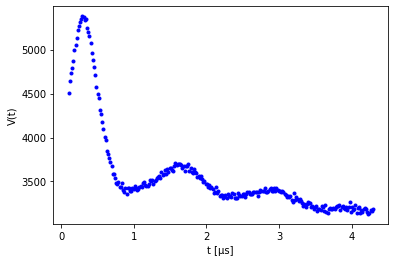

In [44]:

# The full path with filename can be directly passed to the function as well
t,Vexp = dl.deerload('../../data/example_4pdeer_1.DTA') 

# Experiment-specific details 
t0 = 0.1 # μs 

# Phase correction
Vexp = dl.correctphase(Vexp)

# Start time correction
t = t - t[0] # Set the first time interval to zero 
t = t + t0   # Account for the acquistion delay 

# Plot the data
plt.plot(t,Vexp,'b.')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()

### Exercise 2.2: Constructing the 4-pulse DEER model

*Available time: 5min*

- Define a 4-pulse DEER experiment via [``ex_4pdeer``]((https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.ex_4pdeer.html#deerlab.ex_4pdeer)) with $\tau_1$=0.4µs and $\tau_2$=4µs and only the first pathway.

- Define a distance vector in the range 2.2-5.2nm with a 0.02nm resolution.

- Construct the a single-pathway model of the 4-pulse DEER signal using the [``dipolarmodel``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.dipolarmodel.html#deerlab.dipolarmodel) function. Include the experiment information to constrain your model parameters. 

- Display the model's information

In [45]:
# Experiment model
tau1 = 0.4 # µs 
tau2 = 4.0 # µs
my4pdeer = dl.ex_4pdeer(tau1,tau2,pathways=[1])

# Define the distance range
r = np.arange(2.2,5.2,0.02) #nm

# Construct the model
Vmodel = dl.dipolarmodel(t,r, experiment=my4pdeer) 

# Display information about the model
print(Vmodel)

Description: Dipolar signal model
Signature: (mod, reftime, conc, P)
Constants: []
Parameter Table: 
========= ======= ======= ======= ======== ======== ====== ====================================== 
 Name      Lower   Start   Upper    Type    Frozen   Unit   Description                           
========= ======= ======= ======= ======== ======== ====== ====================================== 
 mod           0    0.01       1   nonlin     No            Modulation depth                      
 reftime   0.352     0.4   0.448   nonlin     No      μs    Refocusing time                       
 conc       0.01      50   5e+03   nonlin     No      μM    Spin concentration                    
 P             0       0     inf   linear     No     nm⁻¹   Non-parametric distance distribution  
========= ======= ======= ======= ======== ======== ====== ====================================== 


### Exercise 2.3: Fitting the model to the data

*Available time: 2min*

- Fit your model to the experimental data using the [``fit``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.fit.html#deerlab.fit) function. 

    *Note:* Use the keyword arguments ``ftol=1e-3`` and ``regparam=0.1135`` with the ``fit`` function to speedup the computation (due to low resources on JupyterLab).

In [46]:
# Fit the model to the data
results = dl.fit(Vmodel,Vexp,verbose=2,ftol=1e-2,regparam=0.1135)

# Usually leave the regparam and ftol options to their defaults (here needed due to low resources)

[10-8-2022 16:48:8] Preparing the SNLLS analysis...
[10-8-2022 16:48:8] Preparations completed.
[10-8-2022 16:48:8] Non-linear least-squares routine in progress...
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4659e+07                                    1.55e+08    
       1              2         3.8198e+06      3.08e+07       1.36e+02       8.98e+07    
       2              3         1.3686e+06      2.45e+06       2.08e+01       1.89e+07    
       3              4         1.1579e+06      2.11e+05       1.67e+01       3.15e+06    
       4              5         1.1516e+06      6.33e+03       8.52e-01       5.53e+04    
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 3.4659e+07, final cost 1.1516e+06, first-order optimality 5.53e+04.
[10-8-2022 16:48:9] Least-squares routine finished.
[10-8-2022 16:48:9] Uncertainty analysis in progress...
[10-8-2022 16:48:10] Uncertainty a

- Check the the fit of the model to the data by plotting the results.

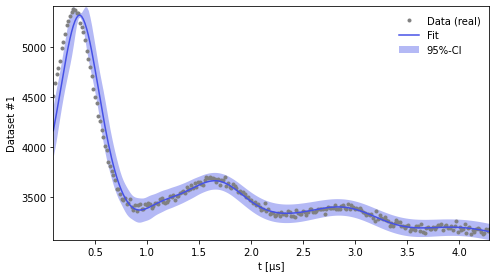

In [47]:
# Plot the data and fit
results.plot(axis=t,xlabel='t [μs]')

# Show the plot
plt.show() 

### Exercise 2.4: Extracting results and uncertainties

*Available time: 5min*

- Inspect the summary of the fit's results. Assess the goodness-of-fit and the fitted parameters. 


In [48]:
print(results)

Goodness-of-fit: 
========= ============= ============ ======== ========== 
 Dataset   Noise level   Reduced 𝛘2    RMSD      AIC     
========= ============= ============ ======== ========== 
   #1        24.222        16.374     93.474   3804.692  
========= ============= ============ ======== ========== 
Model hyperparameters: 
 Regularization parameter  
          0.064            
Model parameters: 
=========== ========== ========================= ====== ====================================== 
 Parameter   Value      95%-Confidence interval   Unit   Description                           
=========== ========== ========================= ====== ====================================== 
 mod         0.298      (0.281,0.316)                    Modulation depth                      
 reftime     0.352      (0.352,0.377)              μs    Refocusing time                       
 conc        148.072    (137.230,158.914)          μM    Spin concentration                    
 P           ... 

- Plot the fitted distance distribution along its 95%-confidence band.

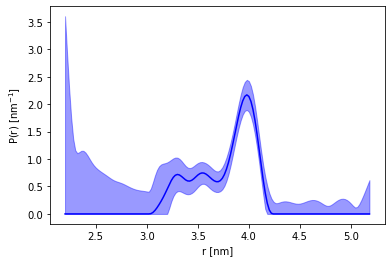

In [49]:
# Get the fitted distance distribution
Pfit = results.P
# Get the uncertainty quantification of the distance distribution
Puq = results.PUncert
# Get its 95% confidence intervals
Pci95 = Puq.ci(95)

# Get the lower/upper boundaries of the confidence intervals
Pci95_lower = Pci95[:,0]
Pci95_upper = Pci95[:,1]

# Plot the fitted distance distribution
plt.plot(r,Pfit,'b')
# Plot the confidence bands as a filled area
plt.fill_between(r,Pci95_lower,Pci95_upper,color='b',alpha=0.4)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()


- Get statistical information on the distance distribution using the ``diststats`` function. How many modes does the distance distribution have? What is the median distance?


In [50]:
stats = dl.diststats(r,Pfit,Puq,verbose=True)

-------------------------------------------------
Distribution Statistics
-------------------------------------------------
Range                    2.20-5.18 nm
Integral                 1.00
-------------------------------------------------
Location
-------------------------------------------------
Range                    2.20-5.18 nm
Mean                     3.76 (3.57,3.95) nm
Median                   3.86 (3.81,3.91) nm
Interquartile mean       3.82 (3.80,3.83) nm
Mode                     3.98 nm
-------------------------------------------------
Spread
-------------------------------------------------
Standard deviation       0.28 (-0.33,0.90) nm
Mean absolute deviation  0.24 (0.05,0.44) nm
Interquartile range      0.45 (0.34,0.57) nm
Variance                 0.08 (-0.27,0.43) nm²
-------------------------------------------------
Shape
-------------------------------------------------
Modality                 3
Skewness                 -0.64 (-20.96,19.68) 
Kurtosis               

------------

## Exercise 2.5: Fitting DEER data with multiple pathway contributions 

*Available time: 8min*

Remember, the dipolar pathways of the 4-pulse DEER experiment are:

<img src="https://github.com/JeschkeLab/DeerLabWorkshop2022/raw/main/images/pathways_scheme.png" alt="drawing" style="width:300px; margin:auto; display:block; "/>


| Pathway | Refocusing time | Description | 
| :---: | ------ | -------------- |
| 1 | $t = \tau_1$ | Main contribution |
| 2 | $t = \tau_1+\tau_2$ | "2+1" contribution | 
| 3 | $t = 0$  | "Inverse 2+1" contribution | 
| 4 | $t = \tau_2$ | No description  | 

In this exercise you will analyze the experimental 4-pulse DEER data ``example_4pdeer_2.DTA`` with additional pathway contributions due to, e.g., pulse excitation overlap. The data was acquired with the following experimental parameters: 

| Delay | Length | Description | 
| :---: | :---: | --- |
| $\tau_1$ |  0.5μs |       First inter-pulse delay | 
| $\tau_2$ |  3.5μs  |      Second inter-pulse delay | 
| $t_0$ |  0.1μs |  Start time | 


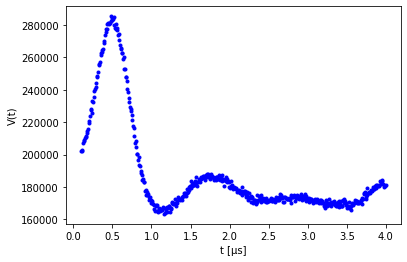

In [51]:
# File location
path = '../../data/'
file = 'example_4pdeer_2.DTA'

# Experimental parameters
tau1 = 0.5      # First inter-pulse delay, μs
tau2 = 3.5      # Second inter-pulse delay, μs
deadtime = 0.1  # Acquisition start time, μs

# Load the experimental data
t,Vexp = dl.deerload(path + file)

# Pre-processing
Vexp = dl.correctphase(Vexp) # Phase correction
t = t + deadtime             # Account for deadtime

# Plot the pre-processed data
plt.plot(t,Vexp,'b.')
plt.xlabel('t [μs]')
plt.ylabel('V(t)')
plt.show()

- Construct the distance vector in the range 2.5-5nm with a resolution of 0.05nm.
- Construct the experiment model with  [``ex_4pdeer``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.ex_4pdeer.html#deerlab.ex_4pdeer). Take into account only pathways #1-3 (in this case we know that pathway #4 must be negligible, so we will leave it out for the sake of speed).
- Construct the dipolar model for the dipolar signal using [``dipolarmodel``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.dipolarmodel.html#deerlab.dipolarmodel) with a non-parametric distance distribution and a homogeneous 3D background decay model.
- Fit the model to the data using a the keyword arguments ``regparam=0.169`` and ``ftol=1e-2`` with the function [``fit``](https://jeschkelab.github.io/DeerLab/_autosummary/deerlab.fit.html#deerlab.fit).
- Display the summary of the fit results. 

In [52]:
# Distance vector
r = np.arange(2.5,5,0.05) # nm

# Construct the model
experiment = dl.ex_4pdeer(tau1,tau2, pathways=[1,2,3])
Vmodel = dl.dipolarmodel(t,r,experiment=experiment)

# Fit the model to the data
results = dl.fit(Vmodel,Vexp, verbose=2, regparam=0.098, ftol=1e-1)


[10-8-2022 16:48:13] Preparing the SNLLS analysis...
[10-8-2022 16:48:13] Preparations completed.
[10-8-2022 16:48:13] Non-linear least-squares routine in progress...
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.1642e+11                                    9.77e+11    
       1              3         2.1854e+10      1.95e+11       2.67e+02       3.35e+11    
       2              4         3.3779e+09      1.85e+10       5.17e+01       7.08e+09    
       3              5         1.3213e+09      2.06e+09       9.73e+01       3.84e+10    
       4              6         7.1637e+08      6.05e+08       7.04e+01       1.10e+11    
       5              7         5.1537e+08      2.01e+08       6.10e+00       1.74e+09    
       6              8         5.1287e+08      2.50e+06       2.24e+00       6.38e+07    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 2.1642e+11, final cost 5.

In [53]:
# Print results summary
print(results)

Goodness-of-fit: 
========= ============= ============ ========== ========== 
 Dataset   Noise level   Reduced 𝛘2     RMSD       AIC     
========= ============= ============ ========== ========== 
   #1       1298.465       1.207      1414.557   1.01e+04  
========= ============= ============ ========== ========== 
Model hyperparameters: 
 Regularization parameter  
          0.098            
Model parameters: 
=========== ========== ========================= ====== ====================================== 
 Parameter   Value      95%-Confidence interval   Unit   Description                           
=========== ========== ========================= ====== ====================================== 
 lam1        0.308      (0.305,0.311)                    Amplitude of pathway #1               
 reftime1    0.502      (0.495,0.509)              μs    Refocusing time of pathway #1         
 lam2        0.053      (0.050,0.057)                    Amplitude of pathway #2               
 reftim

- Execute the cell below to evaluate the function definition.

In [54]:
def plot_pathway_decomposition(results):
    # Extract fitted dipolar signal
    Vfit = results.model
    Pfit = results.P
    # Construct figure with custom size
    plt.figure(figsize=[12,4])
    # Define color HEX values
    violet = '#4550e6'
    green = '#3cb4c6'
    red = '#f84862'
    # Plot the experimental data and the fitted signal
    plt.subplot(121)
    plt.plot(t,Vexp,'.',color='grey',label='Data')
    plt.plot(t,Vfit,linewidth=3,color=violet,label='Fit')
    plt.legend(frameon=False,loc='best')
    plt.xlabel('Time $t$ (μs)')
    plt.ylabel('$V(t)$ (arb.u.)')
    # Plot the contributions of the individual pathways
    plt.subplot(122)
    lams = [results.lam1, results.lam2, results.lam3]
    reftimes = [results.reftime1, results.reftime2, results.reftime3]
    colors= [green, red, violet]
    # Calculat the total background function
    Vinter = results.P_scale*(1-np.sum(lams))*np.prod([dl.bg_hom3d(t-reftime,results.conc,lam) for lam,reftime in zip(lams,reftimes)],axis=0)
    # Loop over individual pathways
    for n,(lam,reftime,color) in enumerate(zip(lams,reftimes,colors)):
        # Calculate and plot the contribution
        Vpath = (1-np.sum(lams) + lam*dl.dipolarkernel(t-reftime,r)@Pfit)*Vinter
        plt.plot(t,Vpath,linewidth=3,label=f'Pathway #{n+1}',color=color)
    plt.legend(frameon=False,loc='best')
    plt.xlabel('Time $t$ (μs)')
    plt.ylabel('$V(t)$ (arb.u.)')
    plt.tight_layout()
    plt.show()

- Plot the fitted signal and the contributions of the individual dipolar pathways.

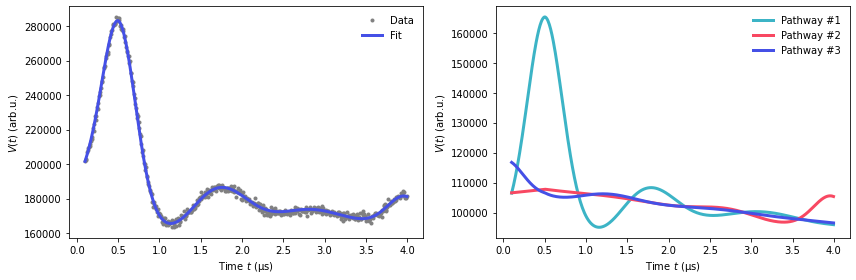

In [55]:
plot_pathway_decomposition(results)

- Plot the fitted distance distribution and its 95%-confidence intervals. (Tip: Re-use the code from previous exercises)

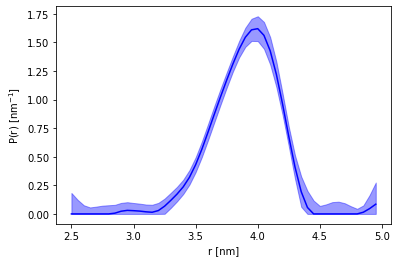

In [56]:
# Get the fitted distance distribution
Pfit = results.P
# Get the uncertainty quantification of the distance distribution
Puq = results.PUncert
# Get its 95% confidence intervals
Pci95 = Puq.ci(95)

# Get the lower/upper boundaries of the confidence intervals
Pci95_lower = Pci95[:,0]
Pci95_upper = Pci95[:,1]

# Plot the fitted distance distribution
plt.plot(r,Pfit,'b')
# Plot the confidence bands as a filled area
plt.fill_between(r,Pci95_lower,Pci95_upper,color='b',alpha=0.4)
plt.xlabel('r [nm]')
plt.ylabel('P(r) [nm$^{-1}$]')
plt.show()

--------------------